In [7]:
%run ../00_AdvancedPythonConcepts/talktools.py

<img src="http://www.asimovinstitute.org/wp-content/uploads/2016/09/neuralnetworks.png">

Source: http://www.asimovinstitute.org/neural-network-zoo/

<img src="https://www.evernote.com/l/AUU9p3_1J5NJX61cCzZPOPc76jm68et-pUgB/image.png">

Source: http://www.wsdm-conference.org/2016/slides/WSDM2016-Jeff-Dean.pdf
This is a good, high-level overview of what's important/current in DNNs.

### Some references/Statements

- "Deep learning" (Nature 2015) http://www.nature.com/nature/journal/v521/n7553/full/nature14539.html

- "HYPING ARTIFICIAL INTELLIGENCE, YET AGAIN" http://www.newyorker.com/tech/elements/hyping-artificial-intelligence-yet-again

- *"Creating a deep learning model is, ironically, a highly manual process. Training a model takes a long time, and even for the top practitioners, it is a hit or miss affair where you don’t know whether it will work until the end. No mature tools exist to ensure models train successfully, or to ensure that the original set up is done appropriately for the data."* -- J. Howard (Fast.ai; http://www.fast.ai/2016/10/07/fastai-launch/)

## Convolutional Neural Nets (CovNets)

NNs built for images (or more generally, inputs with spatial structure).

### Key Ideas: 
  - layers see only parts of each image (effectively all other weights are zero).
  - some layers do simple operations on previous layers to reduce dimensionality (e.g., take the largest value in a a 3x3 range)
  - "Every Layer has a simple API: It transforms an input 3D volume to an output 3D volume with some differentiable function that may or may not have parameters."
 
<img src="http://cs231n.github.io/assets/cnn/cnn.jpeg">

<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg">

"An example input volume in red (e.g. a 32x32x3 CIFAR-10 image), and an example volume of neurons in the first Convolutional layer. Each neuron in the convolutional layer is connected only to a local region in the input volume spatially, but to the full depth (i.e. all color channels). Note, there are multiple neurons (5 in this example) along the depth, all looking at the same region in the input - see discussion of depth columns in text below. "

cf. http://cs231n.github.io/convolutional-networks/

<img src="http://www.nature.com/nature/journal/v521/n7553/images/nature14539-f2.jpg">
Source: http://www.nature.com/nature/journal/v521/n7553/fig_tab/nature14539_F2.html

### Filter banks

  http://setosa.io/ev/image-kernels/

### Pooling

<img src="http://cs231n.github.io/assets/cnn/pool.jpeg" width="40%">
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" width="40%">
Source: http://cs231n.github.io/convolutional-networks/

<div class="alert alert-info">sklearn is not build for deep/complex networks such as required in covnets. We must go to specialized software (and potentially specialized hardware)</div>

# Deep Learning Frameworks

Almost all frameworks written in low-level C++/C with Python (or other scripting bindings)

### Low-level frameworks

   - Tensorflow (Google) Nov 2015
   - Theano
   - Caffe (Berkeley)
   - Torch (Lua)
   - CNTK (Microsoft)
   - PaddlePaddle (Baidu) Aug 2016
   
### High level frameworks (Python)

   - Keras (atop Tensorflow, Theano)
   - TFLearn 
   - nolearn
   - SkFlow (part of tensorflow)
   - [Lasagne](http://lasagne.readthedocs.io/en/latest/index.html) (atop Theano)
   
<img src="https://pbs.twimg.com/media/Cp6UW13UsAAQWWh.jpg" width="75%">
Source: https://twitter.com/fchollet/status/765212287531495424/photo/1?ref_src=twsrc%5Etfw

## Skflow

In [14]:
import tensorflow.contrib.learn as skflow
from tensorflow.contrib import learn
from sklearn import datasets, metrics, cross_validation

import tensorflow as tf
#tf.python.control_flow_ops = tf


In [15]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = cross_validation.train_test_split(
      iris.data, iris.target, test_size=0.2, random_state=42)
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

In [16]:
skflow.DNNClassifier?

In [17]:
classifier = skflow.DNNClassifier(feature_columns=feature_columns,hidden_units=[10, 10], 
                                  n_classes=3,model_dir="/tmp/iris_model")
classifier.fit(iris.data, iris.target,steps=2000)
score = metrics.accuracy_score(iris.target, classifier.predict(iris.data))
print("Accuracy: %f" % score)

Explicitly set `enable_centered_bias` to 'True' if you want to keep existing behaviour.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Accuracy: 0.980000


In [18]:
list(zip(classifier.predict(x_test), y_test))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


[(1, 1),
 (0, 0),
 (2, 2),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 0),
 (0, 0)]

## Keras

### Simple Convnet - MNIST

Slightly modified from mnist_cnn.py in the Keras examples folder:

**https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py**

https://github.com/transcranial/keras-js/blob/master/demos/notebooks/mnist_cnn.ipynb

In [19]:
WEIGHTS_FILEPATH = 'mnist_cnn.hdf5'
MODEL_ARCH_FILEPATH = 'mnist_cnn.json'

In [20]:
import numpy as np
np.random.seed(1337)  # for reproducibility

import tensorflow as tf
tf.python.control_flow_ops = tf

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [21]:
nb_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [22]:
# Sequential Model

model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=input_shape, dim_ordering='tf'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4), border_mode='valid', dim_ordering='tf'))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [23]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 26, 26, 32)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 26, 26, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 6, 6, 32)      0           activation_1[0][0]               
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 1152)          0           maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [ ]:
#!pip install --upgrade pydot-ng

In [25]:
from keras.utils.visualize_util import plot
plot(model, to_file='model.png',show_shapes=True)

In [26]:
# Model saving callback
checkpointer = ModelCheckpoint(filepath=WEIGHTS_FILEPATH, 
                               monitor='val_acc', verbose=1, save_best_only=True)

# Early stopping
early_stopping = EarlyStopping(monitor='val_acc', verbose=1, patience=5)

from keras.callbacks import TensorBoard

# Train
batch_size = 128
nb_epoch = 5
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=2,
          callbacks=[checkpointer, early_stopping,TensorBoard(log_dir='/tmp/mnist')], 
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
Epoch 00000: val_acc improved from -inf to 0.93980, saving model to mnist_cnn.hdf5
58s - loss: 0.4969 - acc: 0.8636 - val_loss: 0.2154 - val_acc: 0.9398
Epoch 2/5
Epoch 00001: val_acc improved from 0.93980 to 0.96300, saving model to mnist_cnn.hdf5
46s - loss: 0.1842 - acc: 0.9465 - val_loss: 0.1266 - val_acc: 0.9630
Epoch 3/5
Epoch 00002: val_acc improved from 0.96300 to 0.97120, saving model to mnist_cnn.hdf5
52s - loss: 0.1347 - acc: 0.9607 - val_loss: 0.1013 - val_acc: 0.9712
Epoch 4/5
Epoch 00003: val_acc improved from 0.97120 to 0.97260, saving model to mnist_cnn.hdf5
49s - loss: 0.1118 - acc: 0.9662 - val_loss: 0.0870 - val_acc: 0.9726
Epoch 5/5
Epoch 00004: val_acc improved from 0.97260 to 0.97480, saving model to mnist_cnn.hdf5
45s - loss: 0.0979 - acc: 0.9706 - val_loss: 0.0786 - val_acc: 0.9748
Test score: 0.0786157571215
Test accuracy: 0.9748


In [27]:
with open(MODEL_ARCH_FILEPATH, 'w') as f:
    f.write(model.to_json())

In [28]:
model.predict_classes(X_test[:10])

10/10 [==============================] - 0s


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

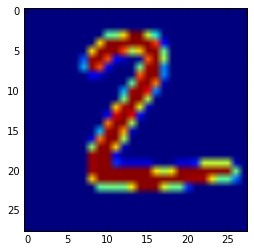

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(X_test[1].reshape(28,28))

https://transcranial.github.io/keras-js/#/mnist-cnn

<img src="http://cs231n.github.io/assets/cnn/convnet.jpeg">

http://cs231n.stanford.edu/

In [ ]:
#!pip install python-resize-image

https://www.vision.caltech.edu/Image_Datasets/Caltech101/

In [ ]:
# %load https://raw.githubusercontent.com/marcuniq/keras/ecf62d40cf03e3ccf849be1f820f3b5ba915f105/examples/caltech101_cnn.py
from __future__ import absolute_import
from __future__ import print_function
import numpy as np

from keras.datasets import caltech101
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
#from keras.layers.normalization import LRN2D
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.utils import np_utils, generic_utils
from six.moves import range

import shutil
import os
from PIL import Image
from resizeimage import resizeimage

'''
    Train a (fairly simple) deep CNN on the Caltech101 images dataset.
    GPU run command:
        THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python caltech101_cnn.py
'''


def resize_imgs(fpaths, shapex, shapey, mode='contain', quality=90, verbose=0):
    resized_fpaths = np.array([])

    tmpdir = os.path.expanduser(os.path.join('~', '.keras', 'datasets', 'tmp'))
    if os.path.exists(tmpdir):
        #shutil.rmtree(tmpdir)
        pass
    else:
        os.makedirs(tmpdir)

    try:
        for i, f in enumerate(fpaths):
            img = Image.open(f)
            if mode is 'contain':
                img = resizeimage.resize_contain(img, [shapex, shapey])
            elif mode is 'crop':
                img = resizeimage.resize_crop(img, [shapex, shapey])
            elif mode is 'cover':
                img = resizeimage.resize_crop(img, [shapex, shapey])
            elif mode is 'thumbnail':
                img = resizeimage.resize_thumbnail(img, [shapex, shapey])
            elif mode is 'height':
                img = resizeimage.resize_height(img, shapey)

            _, extension = os.path.splitext(f)
            out_file = os.path.join(tmpdir, 'resized_img_%05d%s' % (i, extension))
            resized_fpaths = np.append(resized_fpaths, out_file)
            if not os.path.exists:
                img.save(out_file, img.format, quality=quality)
                if verbose > 0:
                    print("Resizing file : %s" % (f))
            img.close()
    except e:
        print("Error resize file : %s" % (f))

    return resized_fpaths


def load_data(X_path, resize=True, shapex=240, shapey=180, mode='contain', quality=90, verbose=0):
    if resize:
        X_path = resize_imgs(X_path, shapex, shapey, mode=mode, quality=quality, verbose=verbose)

    data = np.zeros((X_path.shape[0], 3, shapey, shapex), dtype="uint8")

    for i, f in enumerate(X_path):
        img = Image.open(f)
        r, g, b = img.split()
        data[i, 0, :, :] = np.array(r)
        data[i, 1, :, :] = np.array(g)
        data[i, 2, :, :] = np.array(b)
        img.close()

    return data

# parameters
batch_size = 4
nb_classes = 102
nb_epoch = 10
data_augmentation = False

shuffle_data = True

# shape of the image (SHAPE x SHAPE)
shapex, shapey = 240, 180

# the caltech101 images are RGB
image_dimensions = 3

# load the data, shuffled and split between train and test sets
print("Loading data...")
(X_train_path, y_train), (X_test_path, y_test) = caltech101.load_paths(train_imgs_per_category=15,
                                                                       test_imgs_per_category=3,
                                                                       shuffle=shuffle_data)
X_train = load_data(X_train_path, shapex=shapex, shapey=shapey, mode='contain', verbose=1)
X_test = load_data(X_test_path, shapex=shapex, shapey=shapey, mode='contain', verbose=1)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# cnn architecture from the CNN-S of http://arxiv.org/abs/1405.3531
model = Sequential()

model.add(Convolution2D(96, 7, 7, subsample=(2, 2), input_shape=(image_dimensions, shapex, shapey)))
model.add(Activation('relu'))
#model.add(BatchNormalization(mode=1))
model.add(MaxPooling2D(pool_size=(2, 2), stride=(2, 2)))

model.add(Convolution2D(256, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), stride=(2, 2)))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(512, 3, 3))
model.add(Activation('relu'))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(512, 3, 3))
model.add(Activation('relu'))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(512, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), stride=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

print('Compiling model...')
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

if not data_augmentation:
    print("Not using data augmentation or normalization")
    model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, show_accuracy=True)
    score = model.evaluate(X_test, Y_test, batch_size=batch_size, show_accuracy=True)
    print('Test score:', score)

else:
    print("Using real time data augmentation")

    # this will do preprocessing and realtime data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(X_train)

    for e in range(nb_epoch):
        print('-'*40)
        print('Epoch', e)
        print('-'*40)
        print("Training...")
        # batch train with realtime data augmentation
        progbar = generic_utils.Progbar(X_train.shape[0])
        for X_batch, Y_batch in datagen.flow(X_train, Y_train):
            loss = model.train_on_batch(X_batch, Y_batch)
            progbar.add(X_batch.shape[0], values=[("train loss", loss)])

        print("Testing...")
        # test time!
        progbar = generic_utils.Progbar(X_test.shape[0])
        for X_batch, Y_batch in datagen.flow(X_test, Y_test):
            score = model.test_on_batch(X_batch, Y_batch)
            progbar.add(X_batch.shape[0], values=[("test loss", score)])


# Deep Learning in Science

In [8]:
# Astronomy
from IPython.display import IFrame
IFrame('https://arxiv.org/abs/1509.05429', width="100%", height=600)

In [9]:
# Chemistry
IFrame('http://pubs.acs.org/doi/abs/10.1021/acs.molpharmaceut.6b00248', width="100%", height=600)

In [10]:
# Biology
IFrame('https://followthedata.wordpress.com/2015/12/21/list-of-deep-learning-implementations-in-biology/', width="100%", height=600)

In [11]:
# Physics
IFrame("http://www.nature.com/articles/ncomms5308",width="100%",height="500")